In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.rcParams['figure.figsize'] = (5, 5)

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
data

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
data.shape

(5110, 12)

In [8]:
data.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [9]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
data['bmi'].fillna(data['bmi'].mean(),inplace = True)

In [11]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
data.drop('id',axis = 1, inplace = True)

In [13]:
data

gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level        bmi   smoking_status  stroke  
0             Urban             228.69  36.600000  formerly smoked       1  
1             Rural             202.21  28.893237     never smoked       1  
2             Rural             105.92  32.500000     never smoked       1  
3             Urban             171.23  34.400000           smokes       1  
4             Rural             174.12  24.000000     never smoked       1  
...             ...                ...        ...              ...     ...  
5105          Urban              83.75  28.893237     never smoked       0  
5106          Urban             125.20  40.000000     never smoked       0  
5107          Rural              82.99  30.600000     never smoked       0  
5108          Rural             166.29  25.600000  formerly smoked       0  
5109          Urban              85.28  26.200000          Unknown       0  

[5110 rows x 11 columns]

In [16]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

gender = enc.fit_transform(data['gender'])
ever_married = enc.fit_transform(data['ever_married'])
work_type = enc.fit_transform(data['work_type'])
Residence_type = enc.fit_transform(data['Residence_type'])
smoking_status = enc.fit_transform(data['smoking_status'])

In [17]:
data['gender'] = gender
data['ever_married'] = ever_married
data['work_type'] = work_type
data['Residence_type'] = Residence_type
data['smoking_status'] = smoking_status

In [18]:
data

gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
1          0  61.0             0              0             1          3   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          2   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0                  1             228.69  36.600000               1       1  
1                  0             202.21  28.893237               2       1  
2                  0             105.92  32.500000               2       1  
3                  1             171.23  34.400000               3       1  
4                  0             174.12  24.000000               2       1  
...              ...                ...        ...             ...     ...  
5105               1              83.75  28.893237               2       0  
5106               1             125.20  40.000000               2       0  
5107               0              82.99  30.600000               2       0  
5108               0             166.29  25.600000               1       0  
5109               1              85.28  26.200000               0       0  

[5110 rows x 11 columns]

In [22]:
X = data.drop('stroke', axis = 1)
Y = data['stroke']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [25]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_std = std.fit_transform(X_train)

X_test_std = std.transform(X_test)

# Decision Tree


In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train_std,Y_train)

Y_pred = dt.predict(X_test_std)

In [27]:
from sklearn.metrics import accuracy_score
ac_dt=accuracy_score(Y_test,Y_pred)
ac_dt

0.9070450097847358

[Text(140.16560157482905, 265.3285714285714, 'X[1] <= 1.069\ngini = 0.087\nsamples = 4088\nvalue = [3901, 187]'),
 Text(74.35130769989479, 252.3857142857143, 'X[1] <= 0.583\ngini = 0.041\nsamples = 3398\nvalue = [3327, 71]'),
 Text(39.21602939242504, 239.44285714285715, 'X[2] <= 1.347\ngini = 0.021\nsamples = 2790\nvalue = [2761, 29]'),
 Text(20.019644266175696, 226.5, 'X[1] <= -0.256\ngini = 0.016\nsamples = 2660\nvalue = [2639, 21]'),
 Text(4.6964755391899, 213.55714285714288, 'X[1] <= -1.851\ngini = 0.002\nsamples = 1602\nvalue = [1600, 2]'),
 Text(2.34823776959495, 200.61428571428573, 'X[8] <= -0.258\ngini = 0.03\nsamples = 65\nvalue = [64, 1]'),
 Text(1.174118884797475, 187.67142857142858, 'gini = 0.0\nsamples = 60\nvalue = [60, 0]'),
 Text(3.522356654392425, 187.67142857142858, 'X[0] <= 0.178\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(2.34823776959495, 174.72857142857146, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(4.6964755391899, 174.72857142857146, 'gini = 0.0\ns

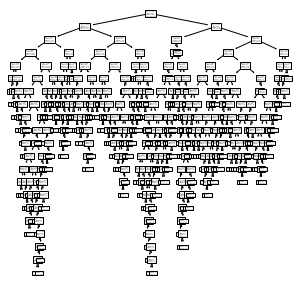

In [30]:
from sklearn import tree

tree.plot_tree(dt)

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(X_train_std,Y_train)

Y_pred_lr = lr.predict(X_test_std)
Y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
ac_lr=accuracy_score(Y_test,Y_pred_lr)
ac_lr

0.9383561643835616

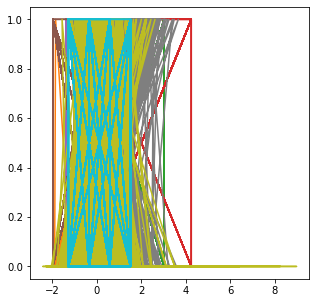

In [42]:
plt.plot(X_train_std,Y_train)
plt.show()

# K-NN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_std,Y_train)
Y_pred = knn.predict(X_test_std)

In [44]:
ac_knn=accuracy_score(Y_test,Y_pred)
ac_knn

0.9344422700587084

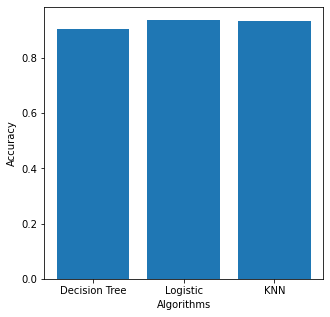

In [58]:
plt.bar(['Decision Tree','Logistic','KNN'],[ac_dt,ac_lr,ac_knn])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()